# CARGA DE DATOS

__TODO__

In [1]:
from Utils import DatasetProcess, reconstruction_plot
from ConvModel import ConvModel
from AutoEncoder import TwoStepAutoEncoder, TwoStepClassifier, TwoStepTraining, OneStepAutoencoder, OneStepTraining
from OneClass import AnomalyDetector
from Contrastive import ContrastiveModel

In [2]:
unlabeled_train, x_train, y_train, x_test, y_test, one_hot_train, one_hot_test = DatasetProcess.alt()

# EJERCICIO 1

Entrena un modelo, creado sobre TensorFlow, haciendo uso únicamente de las instancias etiquetadas de entrenamiento. Dicho modelo debe de tener al menos cuatro capas densas y/o convolucionales.

Responde a las siguientes preguntas:

1. ¿Qué red has escogido? ¿Por qué? ¿Cómo la has entrenado?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Qué conclusiones sacas de los resultados detallados en el punto anterior?

In [24]:
model = ConvModel(learning_rate = 0.001, 
                  dropout_prob = 0.005,
                  l2_lambda=0.25)
history_conv = model.fit(x_train, 
                         y_train, 
                         batch_size=2048, 
                         epochs=150, 
                         patience=15)

Epoch 1/150


/Users/pepe/carrera/3/2/ma2/ma2Python12/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/pepe/carrera/3/2/ma2/ma2Python12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0120 - loss: 40.1908
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.0220 - loss: 38.1837
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.0440 - loss: 36.5167
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.0740 - loss: 35.1032
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.0800 - loss: 33.5331
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.1000 - loss: 32.0877
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.1240 - loss: 30.6337
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.1240 - loss: 29.4403
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.1480 - loss: 28.2139
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.1760 - loss: 26.9886
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.1920 - loss: 25.7133
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.2

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0106 - loss: 6.6455 
Test Score:  0.009999999776482582


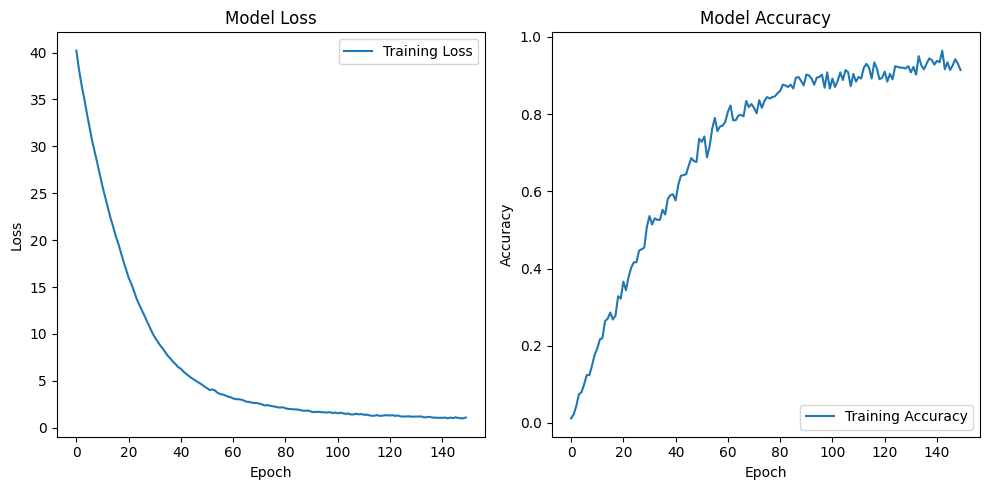

In [25]:
print("Test Score: ", model.score(x_test, y_test))
model.plot(history_conv)

In [26]:
import numpy as np
np.unique(np.argmax(model(x_test),axis=1)) # >> array([60]) # solo predice la clase 60

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step   


array([24])

In [22]:
np.histogram(y_train)

(array([55, 53, 45, 42, 45, 56, 50, 52, 57, 45]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]))

# EJERCICIO 2

Entrena el mismo modelo, incorporando las instancias no etiquetadas de entrenamiento mediante la técnica de auto-aprendizaje. Opcionalmente, se ponderará cada instancia de entrada en función de su calidad (o certeza).

Responde a las siguientes preguntas:
1. ¿Qué parámetros has definido para el entrenamiento?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en el Ejercicio 1?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

In [2]:
def model_func():
    return ConvModel()

self_trained_model = ConvModel.self_training_v2(
    model_func, 
    x_train, 
    y_train, 
    unlabeled_train,
    train_epochs=8,
    thresh=0.65
)

print("Test Score: ", self_trained_model.score(x_test, y_test))

NameError: name 'ConvModel' is not defined

# EJERCICIO 3

Entrena un modelo de aprendizaje semisupervisado de tipo autoencoder en dos pasos (primero el autoencoder, después el clasificador). La arquitectura del encoder debe ser exactamente la misma que la definida en los Ejercicios 1 y 2, a excepción del último bloque de capas.

Responde a las siguientes preguntas:
1. ¿Cuál es la arquitectura del modelo? ¿Y sus hiperparámetros?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en los Ejercicios 1 y 2?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

In [4]:
autoencoder = TwoStepAutoEncoder(input_shape=unlabeled_train[0].shape,
                                learning_rate=0.0015)
classifier = TwoStepClassifier()

In [5]:
TwoStepTraining(autoencoder=autoencoder, 
                classifier=classifier, 
                x_train=x_train, 
                y_train=one_hot_train, 
                unlabeled_train=unlabeled_train, 
                batch_size_autoencoder=256,
                epochs_autoencoder=15,
                batch_size_classifier=4096,
                epochs_classifier=405)

Epoch 1/15


2025-04-01 20:56:37.801118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


196/196 ━━━━━━━━━━━━━━━━━━━━ 149s 740ms/step - loss: 0.0229
Epoch 2/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 147s 748ms/step - loss: 0.0092
Epoch 3/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 147s 748ms/step - loss: 0.0071
Epoch 4/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 147s 748ms/step - loss: 0.0062
Epoch 5/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 147s 748ms/step - loss: 0.0055
Epoch 6/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 147s 749ms/step - loss: 0.0052
Epoch 7/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 146s 747ms/step - loss: 0.0049
Epoch 8/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 146s 744ms/step - loss: 0.0047
Epoch 9/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 147s 747ms/step - loss: 0.0044
Epoch 10/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 146s 746ms/step - loss: 0.0043
Epoch 11/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 146s 745ms/step - loss: 0.0042
Epoch 12/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 145s 741ms/step - loss: 0.0040
Epoch 13/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 146s 746ms/step - loss: 0.0039
Epoch 14/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 146s 745ms/step - loss: 0.0038
Epoch 15/15


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


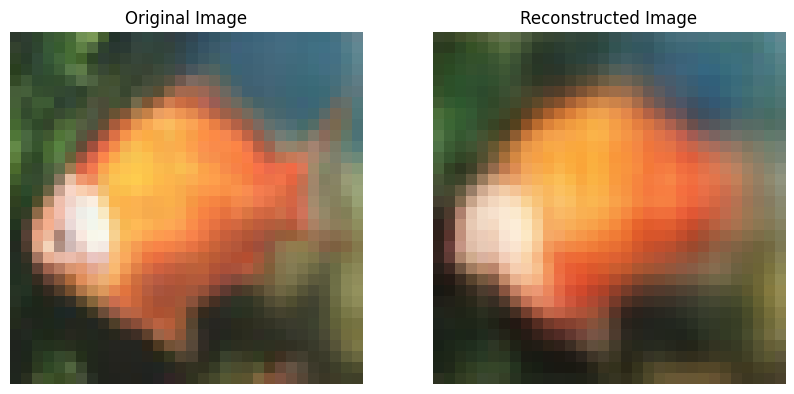

In [15]:
reconstruction_plot(autoencoder, x_test)

In [ ]:
autoencoder.score(x_test)

# EJERCICIO 4

Entrena un modelo de aprendizaje semisupervisado de tipo autoencoder en un paso (autoencoder y clasificador al mismo tiempo). La arquitectura del autoencoder será la misma que la definida en el Ejercicio 3, y la combinación de encoder y clasificador será igual a la arquitectura definida en el
Ejercicio 1.

Responde a las siguientes preguntas:
1. ¿Cuál es la arquitectura del modelo? ¿Y sus hiperparámetros?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en los ejercicios anteriores?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

In [4]:
one_step_autoencoder = OneStepAutoencoder(input_shape=unlabeled_train[0].shape,
                                learning_rate=0.0015,
                                decoder_extra_loss_weight = 0.3)

In [5]:
h = OneStepTraining(one_step_autoencoder, 
                    x_train=x_train, 
                    y_train=one_hot_train, 
                    unlabeled_train=unlabeled_train,
                    batch_size=256,
                    epochs=3)

Epoch 1/3


2025-04-02 11:31:19.217127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


196/196 ━━━━━━━━━━━━━━━━━━━━ 152s 757ms/step - classifier_accuracy: 0.0116 - classifier_loss: 0.0856 - decoder_loss: 0.0251 - loss: 0.0926    
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 151s 769ms/step - classifier_accuracy: 0.0149 - classifier_loss: 0.0569 - decoder_loss: 0.0131 - loss: 0.0569
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 155s 792ms/step - classifier_accuracy: 0.0329 - classifier_loss: 0.0272 - decoder_loss: 0.0113 - loss: 0.0337


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


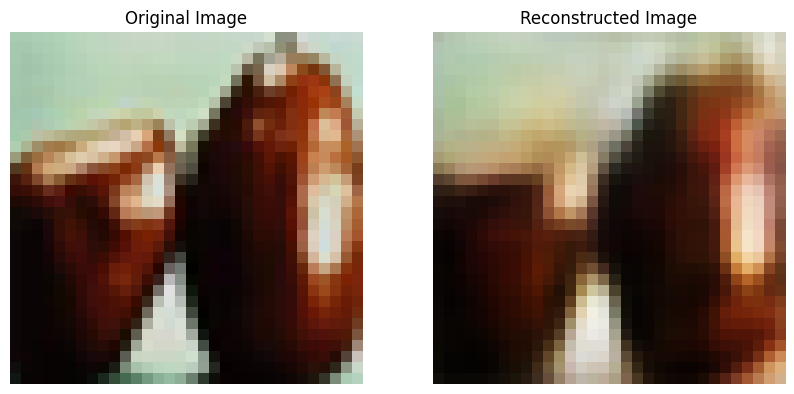

In [26]:
reconstruction_plot(one_step_autoencoder, x_test)

In [ ]:
one_step_autoencoder.score(x_test)

# EJERCICIO 5

Repite el mismo entrenamiento de los Ejercicios 1-4, pero eliminando las instancias no etiquetadas
más atípicas con respecto a los datos etiquetados. Se cumplirán los siguientes puntos:
- La arquitectura de la red de clasificación en una clase será la misma a la utilizada en el
clasificador del Ejercicio 1, a excepción de la capa de salida.
- Utiliza la técnica explicada en el Notebook 5, usando un valor de 𝑣 = 0,9.

Responde a la siguiente pregunta:
1. ¿Se mejoran los resultados con respecto a los anteriores ejercicios? ¿Qué conclusiones sacas de estos resultados?

In [3]:
model = AnomalyDetector(input_shape=(32,32,3), 
                        nu=.9,
                        l2_lambda=0.0,
                        learning_rate=0.0001,
                        dropout_prob=0.1)
model.fit(x_train, 
          batch_size=256, 
          epochs=50, 
          delta=.025, 
          steps=100)

/Users/pepe/carrera/3/2/ma2/ma2Python12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-02 11:54:37.288754: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-02 11:54:37.288780: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-02 11:54:37.288786: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-02 11:54:37.288801: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-02 11:54:37.288814: I tensorflow/core/common_runtime/pluggable_device/pluggable_devi

Epoch 1/50


2025-04-02 11:54:37.970857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step  loss: 0.7178
Cambiando r a 0.5328783 , max: 0.5992215 , min: 0.5122667
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 652ms/step - loss: 0.6868
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step- loss: 0.0133
Cambiando r a 0.5568626 , max: 0.6665995 , min: 0.51814854
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.0122
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step- loss: 5.7473e-04
Cambiando r a 0.550461 , max: 0.69751024 , min: 0.49714294
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 5.1290e-04
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step- loss: 0.0000e+00
Cambiando r a 0.5267882 , max: 0.70606005 , min: 0.4647589
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 0.0000e+00
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step- loss: 0.0000e+00
Cambiando r a 0.49288738 , max: 0.70016086 , min: 0.42564684
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 0.0000e+00
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step- loss: 0.0000e+00
Cambiando r a 0.45225528 , max: 

<Sequential name=sequential, built=True>

In [4]:
import numpy as np

# TODO: Evalúa el modelo con los datos del conjunto de test. Indica el porcentaje de datos etiquetados como típicos, y visualiza los datos
predicciones = model.predict(x_test)

# Determinamos qué datos son típicos (normales) y cuáles son anomalías
# Un dato es típico si su predicción es mayor que r
r_valor = model.model.r.numpy()
es_tipico = predicciones > r_valor

# Calculamos el porcentaje de datos etiquetados como típicos
porcentaje_tipicos = np.mean(es_tipico) * 100

print(f"Valor de r: {r_valor:.4f}")
print(f"Porcentaje de datos etiquetados como típicos: {porcentaje_tipicos:.2f}%")
print(f"Porcentaje de datos etiquetados como anomalías: {100 - porcentaje_tipicos:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 
Valor de r: 0.0040
Porcentaje de datos etiquetados como típicos: 88.42%
Porcentaje de datos etiquetados como anomalías: 11.58%


In [5]:
np.unique(predicciones)

array([0.0023041 , 0.00237586, 0.00239053, ..., 0.02093024, 0.02126487,
       0.02391375], dtype=float32)

In [ ]:
# TODO: Evalúa el modelo con los datos del conjunto de outliers. Indica el porcentaje de datos etiquetados como atípicos, y visualiza los datos en conjunto con los de test
predicciones_outliers = model.predict(x_outliers)
r_valor = model.model.r.numpy()
es_atipico_outliers = predicciones_outliers <= r_valor
porcentaje_atipicos_outliers = np.mean(es_atipico_outliers) * 100

# Evaluamos también los datos de test para comparar
predicciones_test = model.predict(x_test)
es_atipico_test = predicciones_test <= r_valor

print(f"Porcentaje de outliers etiquetados como atípicos: {porcentaje_atipicos_outliers:.2f}%")

# EJERCICIO 6

Repite los Ejercicios 3-5 cambiando el autencoder por la técnica definida en el apartado “Hay vida más allá del autoencoder” del Notebook 4. Contesta a las preguntas de dichos ejercicios. Se cumplirán los siguientes puntos:

1. La arquitectura de la red será igual a la parte encoder del autencoder definido en los
ejercicios anteriores.
2. El modelo debe entrenar correctamente.

In [ ]:
cModel = ContrastiveModel(unlabeled_train[0].shape, 
                          learning_rate=0.05, 
                          lambda_param=.9,
                          l2_lambda=0.001)
cModel.train(unlabeled_train, 
             epochs=5, 
             batch_size=2048)
cModel.plot_training_history()

2025-04-02 15:57:16.496922: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-04-02 15:57:16.497024: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-02 15:57:16.497044: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-02 15:57:16.497102: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-02 15:57:16.497155: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/pepe/carrera/3/2/ma2/ma2Python12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a l

Epoch 1/5, Total Loss: 22.6082, Contrastive Loss: 22.6074, Clustering Loss: 0.0009


In [ ]:
n_samples = 100
test_samples = x_test[:n_samples].reshape(n_samples,32,32,3)

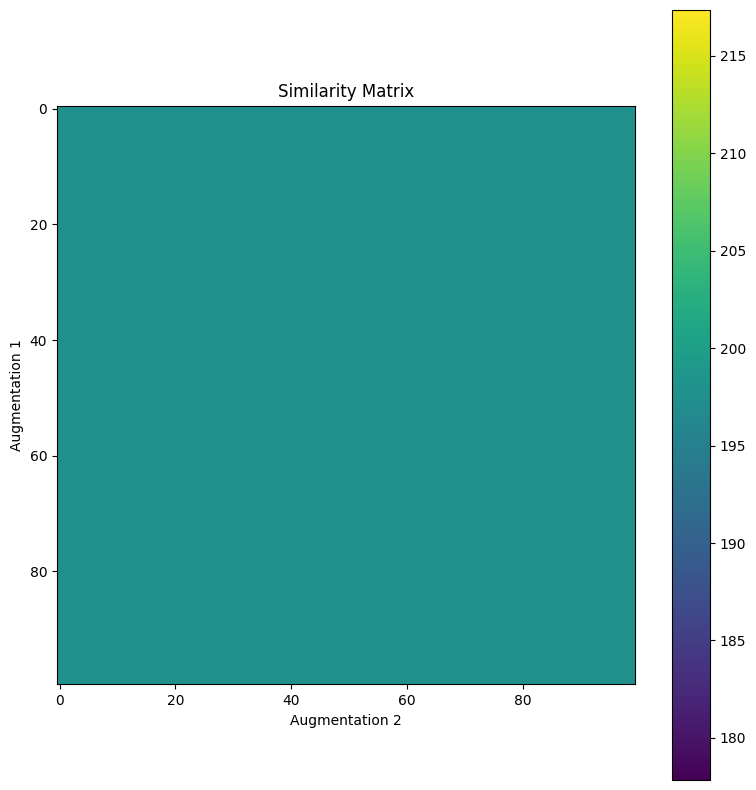

In [6]:
n_samples = 100
test_samples = x_test[:n_samples].reshape(n_samples,32,32,3)

cModel.plot_similarity_matrix(test_samples, n_samples=n_samples);